In [60]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
os.environ['TWITTER_TOKEN'] = ''

camara_base_url = 'https://dadosabertos.camara.leg.br/api/v2/'

# Definição de Funções Auxiliares 

In [2]:
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {os.environ['TWITTER_TOKEN']}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params, verify=False)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


# Dados Públicos Câmara dos Deputados


In [54]:
url = f'{camara_base_url}/deputados'

response = requests.get(url)
if not response.ok: # != 200:
    raise Exception('Nao foi possivel recuperar os dados')

df_deputados = pd.DataFrame().from_dict(json.loads(response.text)['dados'])
print(df_deputados.shape)
df_deputados.head()

(513, 9)


,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
1,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


## Bancadas de Partidos 

Text(0.5, 1.0, 'Tamanho da Bancada dos Partidos')

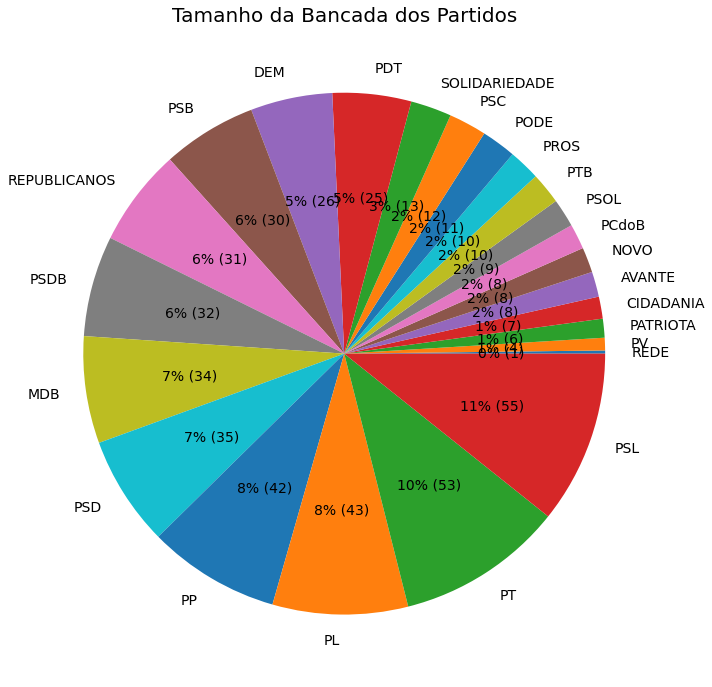

In [73]:
plt.figure(figsize=(12,12))

def autopct_label(x):
    return '{:.0f}% ({:.0f})'.format(x, total*x/100)

total = df_deputados.shape[0]

(df_deputados.groupby('siglaPartido')
             .nome
             .nunique()
             .sort_values()
             .plot(kind='pie', startangle=0, fontsize=14, autopct=autopct_label)
)
plt.ylabel('')
plt.title(f'Tamanho da Bancada dos Partidos', fontsize=20)


## Despesas dos Deputados

In [86]:
url = f'{camara_base_url}/deputados'

list_expenses = []
for id_deputado in tqdm(df_deputados.id.unique()):
    url = f'{camara_base_url}/deputados/{id_deputado}/despesas'
    response = requests.get(url)
    if not response.ok: # != 200:
        raise Exception('Nao foi possivel recuperar os dados')
    df_resp = pd.DataFrame().from_dict(json.loads(response.text)['dados'])
    df_resp['id'] = id_deputado
    list_expenses.append(df_resp)
df_expenses = pd.concat(list_expenses)
df_expenses.head()

100%|██████████| 513/513 [03:17<00:00,  2.60it/s]


,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2021.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7253869.0,Nota Fiscal,0.0,2021-08-01,00005642,560.00,https://www.camara.leg.br/cota-parlamentar/doc...,'MICRO & SOFT INFORMATICA LTDA,40575110000104,560.00,0.0,,1793407.0,0.0,204554
1,2021.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7281555.0,Nota Fiscal,0.0,2021-09-01,00005751,560.00,https://www.camara.leg.br/cota-parlamentar/doc...,'MICRO & SOFT INFORMATICA LTDA,40575110000104,560.00,0.0,,1805744.0,0.0,204554
2,2021.0,10.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7296020.0,Nota Fiscal,0.0,2021-10-01,00005812,560.00,https://www.camara.leg.br/cota-parlamentar/doc...,'MICRO & SOFT INFORMATICA LTDA,40575110000104,560.00,0.0,,1812104.0,0.0,204554
3,2021.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7295374.0,Nota Fiscal,0.0,2021-11-01,00005926,560.00,https://www.camara.leg.br/cota-parlamentar/doc...,'MICRO & SOFT INFORMATICA LTDA,40575110000104,560.00,0.0,,1812069.0,0.0,204554
4,2021.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7246318.0,Nota Fiscal Eletrônica,4.0,2021-08-30,55152,61.78,http://camara.leg.br/cota-parlamentar/nota-fis...,COMERCIAL DE ALIMENTOS CERES S/A,06141514000224,61.78,0.0,,1789822.0,0.0,204554


### Valor Liquido Total e Por Deputado 

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
X =(df_expenses.groupby('siglaPartido')
            .valorLiquido
            .sum()
            .sort_values())
(X / 1e6).plot.barh()
plt.ylabel('Sigla Partido')
plt.xlabel('Valor Líquido [R$ MM]')
plt.grid()
expense_years = '-'.join(df_expenses.ano.astype(str).str.replace('.0','',regex=False).unique())
plt.title(f"Despesas dos Partidos em {expense_years}")

plt.subplot(1,2,2)
Xn = df_deputados.groupby('siglaPartido', as_index=False).nome.nunique()
Xn = Xn.merge(X.reset_index(), on='siglaPartido')
Xn['ValorMedioPorCandidato'] = Xn['valorLiquido'] / Xn['nome']
(Xn.set_index('siglaPartido')
   .sort_values('ValorMedioPorCandidato')
   .ValorMedioPorCandidato
   .plot
   .barh()
)
plt.ylabel('Sigla Partido')
plt.xlabel('Valor Líquido [R$]')
plt.grid()
expense_years = '-'.join(df_expenses.ano.astype(str).str.replace('.0','',regex=False).unique())
plt.title(f"Despesas Média por Candidato dos Partidos em {expense_years}")
plt.tight_layout()

### Tipos de Despesas de Maior Valor 

Text(0.5, 1.0, 'Valor Líquido por Tipo de Despesa em 2021')

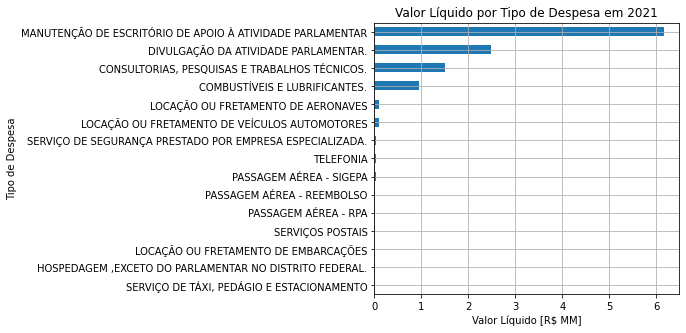

In [130]:
df_expenses.tipoDespesa.unique()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
X =(df_expenses.groupby('tipoDespesa')
            .valorLiquido
            .sum()
            .sort_values())
(X / 1e6).plot.barh()
plt.ylabel('Tipo de Despesa')
plt.xlabel('Valor Líquido [R$ MM]')
plt.grid()
expense_years = '-'.join(df_expenses.ano.astype(str).str.replace('.0','',regex=False).unique())
plt.title(f"Valor Líquido por Tipo de Despesa em {expense_years}")


# Request para API Twitter 

In [3]:
#Change to the endpoint you want to collect data from
search_url = "https://api.twitter.com/2/tweets/search/recent"
# search_url = "https://api.twitter.com/2/tweets/search/all" 
keyword = "xbox lang:en"
start_time = "2021-03-01T00:00:00.000Z"
end_time = "2021-03-31T00:00:00.000Z"
max_results = 15

query_params = {'query': '(from:twitterdev -is:retweet) OR #twitterdev',
                'tweet.fields': 'author_id'
               }

# query_params = {'query': keyword,
#                 'start_time': start_time,
#                 'end_time': end_time,
#                 'max_results': max_results,
#                 'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
#                 'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
#                 'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
#                 'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
#                 'next_token': {}}


json_response = connect_to_endpoint(search_url, query_params)
print(json.dumps(json_response, indent=4, sort_keys=True))

C:\Users\BZ241WX\AppData\Local\Continuum\anaconda3\envs\infnet-ead\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.twitter.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


200
{
    "data": [
        {
            "author_id": "1260015280048222208",
            "id": "1484455835057201153",
            "text": "RT @chaniee_bob: Beauty Spa web page design \ud83d\udc4d\u2705\n\n#100DaysOfCode #100DaysOfDesign #WomenWhoCode #TwitterDev https://t.co/OdIZl3pE49"
        },
        {
            "author_id": "1327935633445199874",
            "id": "1484455669382238217",
            "text": "RT @chaniee_bob: Beauty Spa web page design \ud83d\udc4d\u2705\n\n#100DaysOfCode #100DaysOfDesign #WomenWhoCode #TwitterDev https://t.co/OdIZl3pE49"
        },
        {
            "author_id": "1347396338581790723",
            "id": "1484455424803971074",
            "text": "RT @chaniee_bob: Beauty Spa web page design \ud83d\udc4d\u2705\n\n#100DaysOfCode #100DaysOfDesign #WomenWhoCode #TwitterDev https://t.co/OdIZl3pE49"
        },
        {
            "author_id": "241031473",
            "id": "1484435074946797569",
            "text": "RT @chaniee_bob: Beauty Spa we